## Exploratory Analysis on Adult Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [2]:
adult = pd.read_csv(r"D:\saikrishna data science\INNOMATICS INTERNSHIP\DATA ANALYSIS PROJECTS\ADULT\adult.csv")
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult.shape

(48842, 15)

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
missing_val = ['n/a', '-', '?']

df = pd.read_csv(r'D:\saikrishna data science\INNOMATICS INTERNSHIP\DATA ANALYSIS PROJECTS\ADULT\adult.csv', na_values = missing_val)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Missing values Treatment in Columns

In [7]:
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

### Missing values Treatment in Rows

In [8]:
missing_values = df[df.isnull().sum(axis=1) >= 3]
missing_values

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K
2584,47,NaN,163748,Masters,14,Divorced,NaN,Unmarried,White,Female,0,0,35,NaN,<=50K
2612,27,NaN,258231,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,35,NaN,<=50K
2774,27,NaN,132372,HS-grad,9,Never-married,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K
3074,23,NaN,264874,Assoc-voc,11,Never-married,NaN,Other-relative,White,Female,0,0,40,NaN,<=50K
3671,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,11,NaN,<=50K
3853,28,NaN,195568,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,15,NaN,>50K
5052,21,NaN,156780,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
5972,40,NaN,95049,Assoc-voc,11,Separated,NaN,Own-child,White,Female,0,0,40,NaN,<=50K


In [9]:
df.shape

(48842, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
# retaining the rows having <= 4 NaNs
df = df[df.isnull().sum(axis=1) <= 3]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [12]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [13]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
df.dropna(how='any', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [17]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(45175, 15)

In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [20]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Univariate Analysis for Numerical Features

In [21]:
num_col=df.describe().T.index

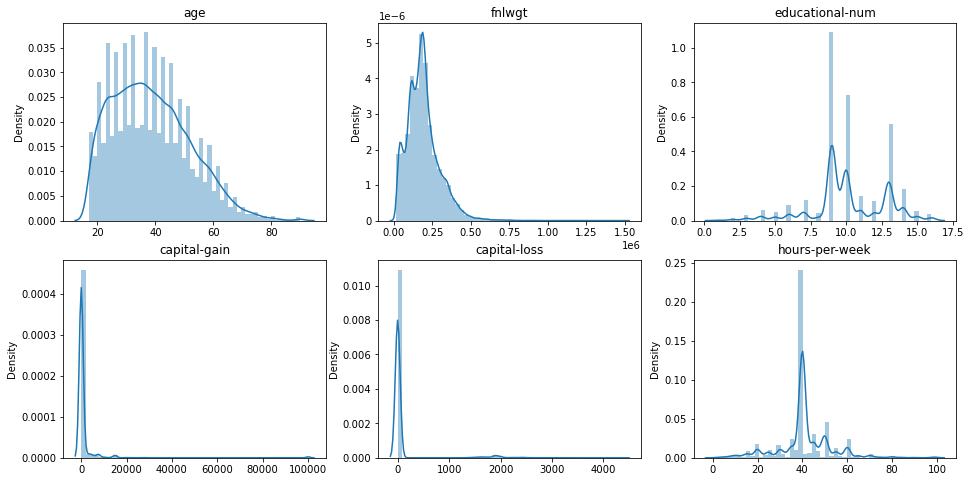

In [22]:
plt.figure(figsize=(16,8))

for i,j in enumerate(num_col):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[j])
    plt.title(j)

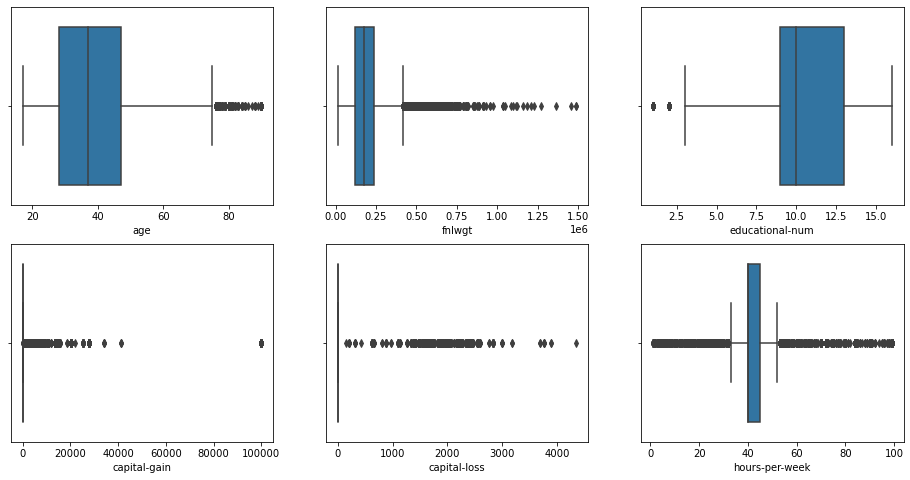

In [23]:
plt.figure(figsize=(16,8))

for i,j in enumerate(num_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[j])

+ 'age', 'fnlwgt' is Right skewwed distribution
+ 'educational-num', 'capital-gain' and 'capital-loss' has lots of outlier thats need to be deleted 

In [24]:
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [25]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


### REMOVING THE OUTLIERS

In [26]:
def out_rem(column):
    q3 = df[column].quantile(q=0.75)
    q1 = df[column].quantile(q=0.25)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    out_idx = df[(df[column]>upper_bound) | (df[column]<lower_bound)].index
    print(df[column].name)
    print(q3,"-",q1,"=",iqr)
    print(upper_bound)
    print(lower_bound)
    print(out_idx)
    df.drop(labels=(out_idx),axis=0,inplace=True)
    sns.kdeplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()

age
47.0 - 28.0 = 19.0
75.5
-0.5
Int64Index([  234,   899,   951,  1034,  1079,  1373,  1398,  2085,  2290,
             2294,
            ...
            45002, 45229, 45429, 45875, 47311, 48095, 48136, 48558, 48648,
            48740],
           dtype='int64', length=268)


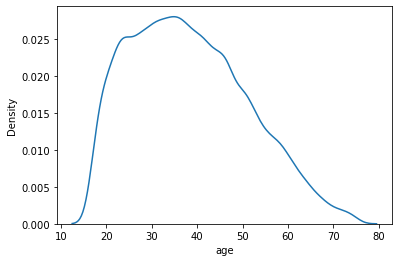

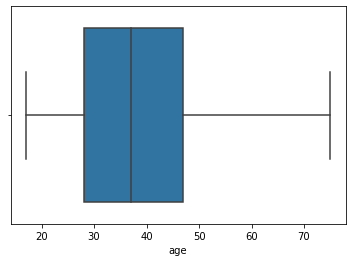

In [27]:
out_rem("age")

fnlwgt
238082.5 - 117467.5 = 120615.0
419005.0
-63455.0
Int64Index([   16,    25,    42,    66,    95,   130,   149,   157,   217,
              288,
            ...
            48475, 48486, 48489, 48553, 48567, 48587, 48610, 48751, 48777,
            48792],
           dtype='int64', length=1327)


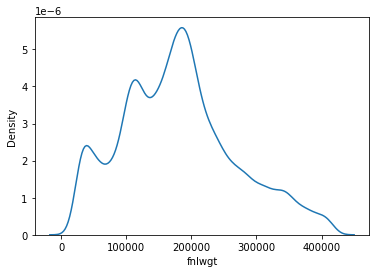

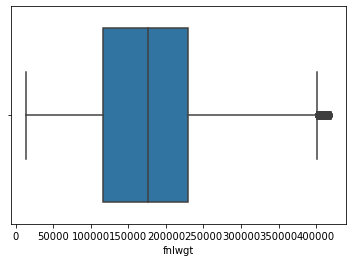

In [28]:
out_rem("fnlwgt")

In [29]:
df.shape

(43580, 13)

## Univariate Analysis for Categorical Features

### WORK CLASS

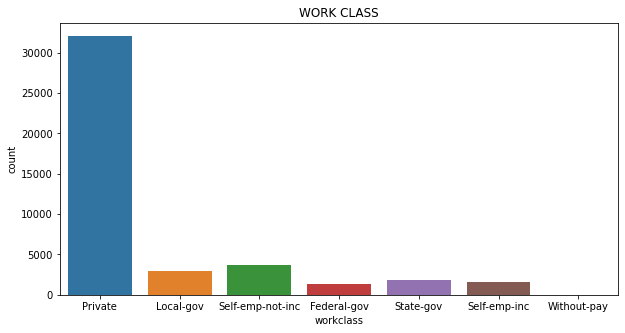

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df['workclass'])
plt.xticks(rotation=0,fontsize=10)
plt.title('WORK CLASS')
plt.show()

+ Private job have highest no. of counts

### EDUCATION

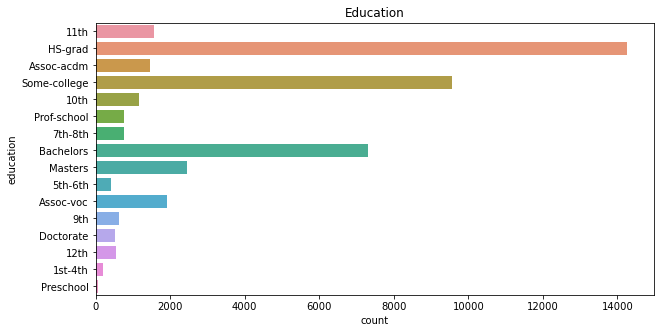

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['education'])
plt.xticks(rotation=0,fontsize=10)
plt.title('Education')
plt.show()

+ High School Graduate have highest no. of count
+ Followed by Some College
+ Followed by Bachelors

### Marital-Status

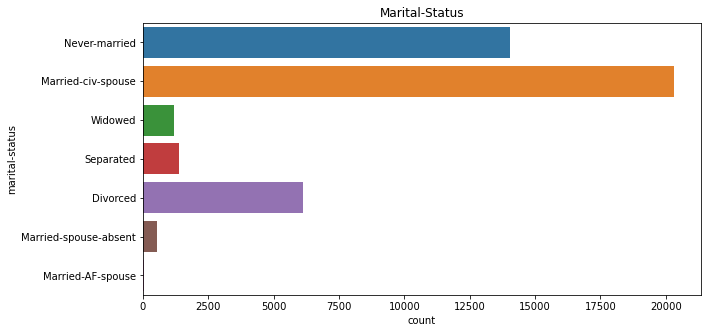

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['marital-status'])
plt.xticks(rotation=0,fontsize=10)
plt.title('Marital-Status')
plt.show()

+ Married-civ-spouse have highest no. of count
+ Followed by Never-Married
+ Followed by divorced

### OCCUPATION

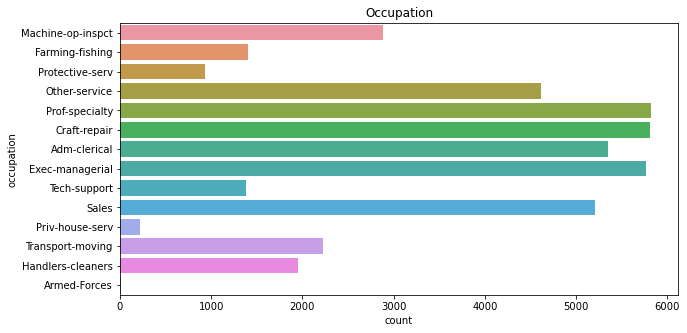

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['occupation'])
plt.xticks(rotation=0,fontsize=10)
plt.title('Occupation')
plt.show()

+ Maximum category of ocupation are well no. of count

### RELATIONSHIP

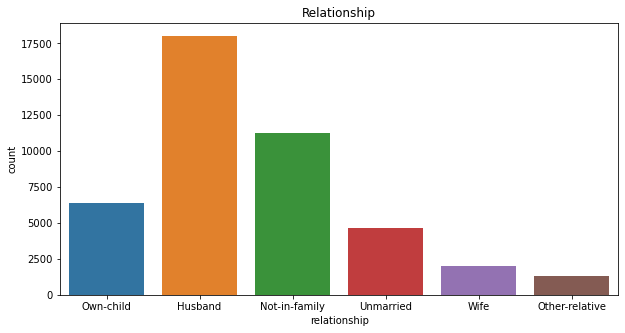

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['relationship'])
plt.xticks(rotation=0,fontsize=10)
plt.title('Relationship')
plt.show()

### RACE

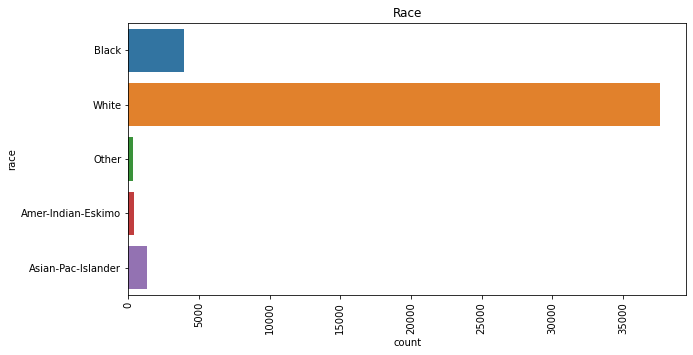

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['race'])
plt.xticks(rotation=90,fontsize=10)
plt.title('Race')
plt.show()

+ We can clearly the White people domination here also :|

### TOP 20 NATIVE-COUNTRY

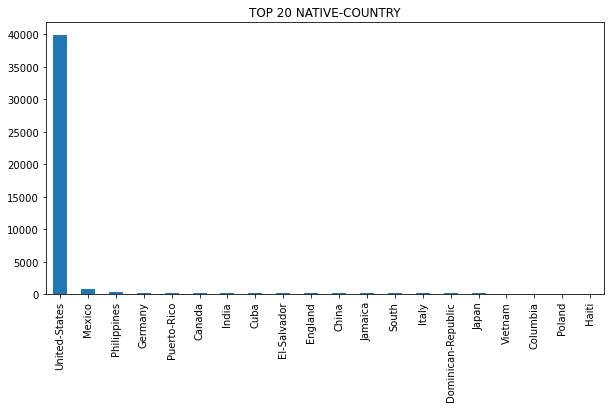

In [36]:
plt.figure(figsize=(10,5))
city=df['native-country'].value_counts()[:20].plot.bar()
plt.title('TOP 20 NATIVE-COUNTRY')
plt.show()

+ Here we go United States dominating every country :(

### INCOME

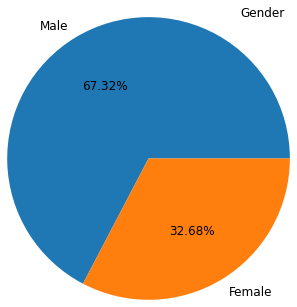

In [37]:
plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%.2f%%',textprops={'size': 'large'},radius=1.3)
plt.title('Gender',loc='right')
plt.show()

### GENDER

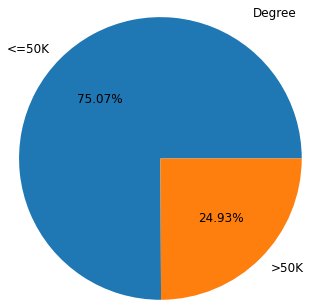

In [38]:
plt.figure(figsize=(5,5))
plt.pie(df['income'].value_counts(),labels=df['income'].value_counts().index,autopct='%.2f%%',textprops={'size': 'large'},radius=1.3)
plt.title('Degree',loc='right')
plt.show()

## Bivariate Analysis

### COMPARING THE AGE WITH FNLWGT 

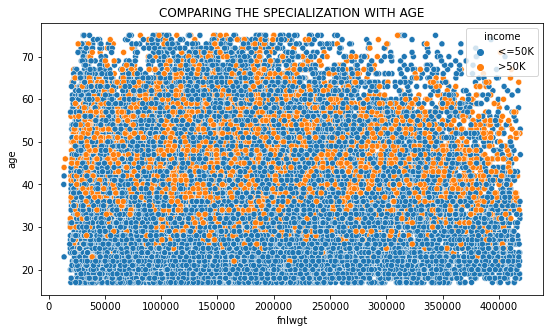

In [39]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='fnlwgt',y='age',data=df,hue="income")
plt.xticks(rotation=0,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH AGE')
plt.show()

+ As per orange color dispersion, we can see that salary greater than 50k is after 28-30 year age

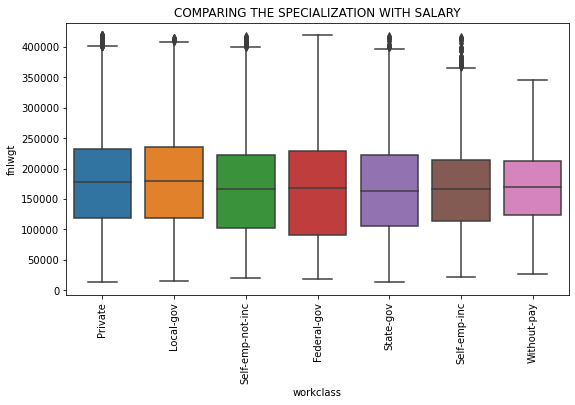

In [40]:
plt.figure(figsize=(9,5))
sns.boxplot(x='workclass',y='fnlwgt',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SPECIALIZATION WITH SALARY')
plt.show()

+ Mean Salary of every type of job is approx equal
+ Highest Salary of each job type is also same

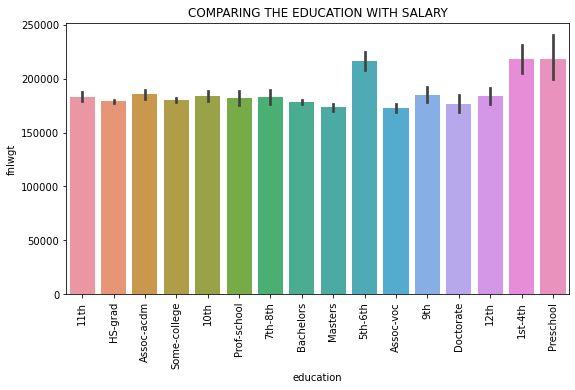

In [41]:
plt.figure(figsize=(9,5))
sns.barplot(x='education',y='fnlwgt',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE EDUCATION WITH SALARY')
plt.show()

This makes no Sense!!!

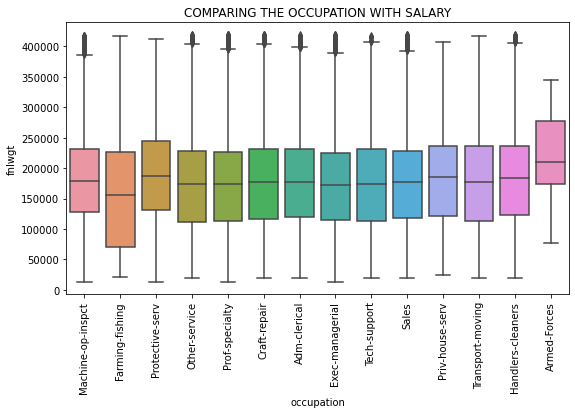

In [42]:
plt.figure(figsize=(9,5))
sns.boxplot(x='occupation',y='fnlwgt',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE OCCUPATION WITH SALARY')
plt.show()

+ Armed Force has slightly high mean salary than other occupation

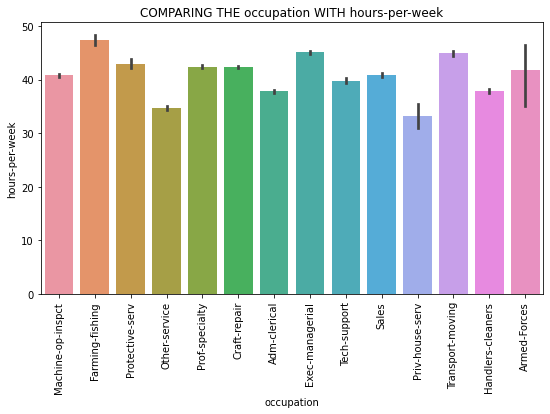

In [43]:
plt.figure(figsize=(9,5))
sns.barplot(x='occupation',y='hours-per-week',data=df)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE occupation WITH hours-per-week')
plt.show()

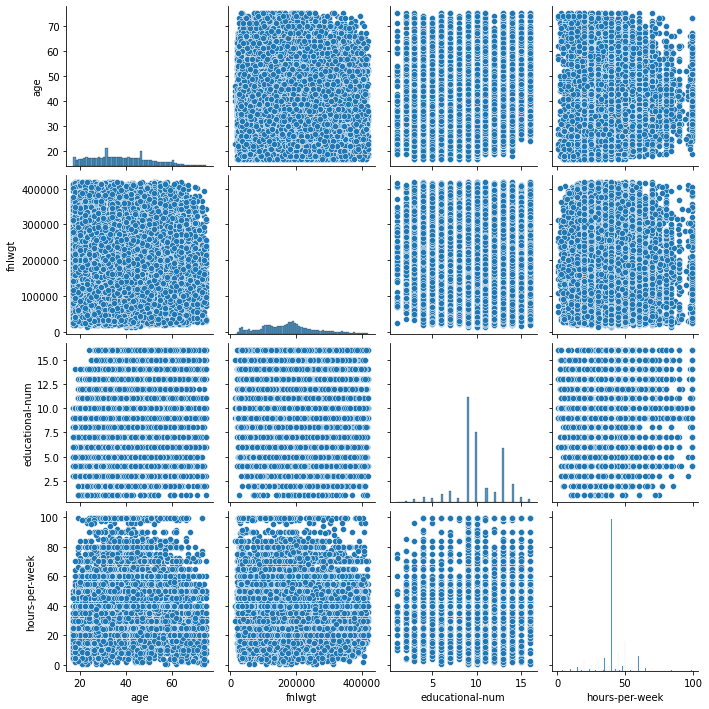

In [44]:
sns.pairplot(df)
plt.show()

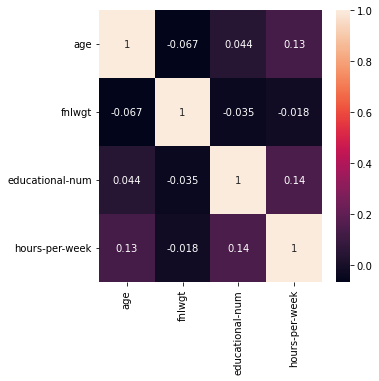

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### STATISTICS FOR DATA ANALYSIS

#### Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)


In [46]:
df['gender'].value_counts()

Male      29340
Female    14240
Name: gender, dtype: int64

In [47]:
df['occupation'].value_counts()

Prof-specialty       5825
Craft-repair         5807
Exec-managerial      5771
Adm-clerical         5347
Sales                5211
Other-service        4611
Machine-op-inspct    2883
Transport-moving     2231
Handlers-cleaners    1948
Farming-fishing      1401
Tech-support         1379
Protective-serv       936
Priv-house-serv       216
Armed-Forces           14
Name: occupation, dtype: int64

- NULL HYPOTHESIS : H0 THERE ARE INDEPENDENT

- ALTERNATIVE HYPOTHESIS : H1 THERE ARE DEPENDENT

In [48]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df.occupation, df.gender, margins=True)

gender,Female,Male,All
occupation,,,
Adm-clerical,3605,1742,5347
Armed-Forces,0,14,14
Craft-repair,308,5499,5807
Exec-managerial,1670,4101,5771
Farming-fishing,92,1309,1401
Handlers-cleaners,241,1707,1948
Machine-op-inspct,776,2107,2883
Other-service,2568,2043,4611
Priv-house-serv,203,13,216


In [49]:
# These are the observed frequencies

observed = pd.crosstab(df.occupation, df.gender)

observed

gender,Female,Male
occupation,,
Adm-clerical,3605,1742
Armed-Forces,0,14
Craft-repair,308,5499
Exec-managerial,1670,4101
Farming-fishing,92,1309
Handlers-cleaners,241,1707
Machine-op-inspct,776,2107
Other-service,2568,2043
Priv-house-serv,203,13


In [50]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(8304.359426778328,
 0.0,
 13,
 array([[1747.16108307, 3599.83891693],
        [   4.57457549,    9.42542451],
        [1897.46856356, 3909.53143644],
        [1885.70536944, 3885.29463056],
        [ 457.78430473,  943.21569527],
        [ 636.51950436, 1311.48049564],
        [ 942.03579624, 1940.96420376],
        [1506.66911427, 3104.33088573],
        [  70.57916475,  145.42083525],
        [1903.35016062, 3921.64983938],
        [ 305.84304727,  630.15695273],
        [1702.7223497 , 3508.2776503 ],
        [ 450.59568609,  928.40431391],
        [ 728.9912804 , 1502.0087196 ]]))

In [51]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degree_of_freedom = chi2_contingency(observed)[2]

In [52]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, degree_of_freedom)

chi2_critical

19.81192930712756

In [53]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [54]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


#### Is there a relationship between gender and income?

In [55]:
df['gender'].value_counts()

Male      29340
Female    14240
Name: gender, dtype: int64

In [56]:
df['income'].value_counts()

<=50K    32717
>50K     10863
Name: income, dtype: int64

- NULL HYPOTHESIS : H0 THERE ARE INDEPENDENT

- ALTERNATIVE HYPOTHESIS : H1 THERE ARE DEPENDENT

In [57]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(df.income, df.gender, margins=True)

gender,Female,Male,All
income,,,
<=50K,12615,20102,32717
>50K,1625,9238,10863
All,14240,29340,43580


In [58]:
# These are the observed frequencies

observed = pd.crosstab(df.income, df.gender)

observed

gender,Female,Male
income,,
<=50K,12615,20102
>50K,1625,9238


In [59]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(2063.4704144520956,
 0.0,
 1,
 array([[10690.45617256, 22026.54382744],
        [ 3549.54382744,  7313.45617256]]))

In [60]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat1 = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
degree_of_freedom = chi2_contingency(observed)[2]

In [61]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical1 = chi2.ppf(1 - alpha, degree_of_freedom)

chi2_critical1

2.705543454095404

In [62]:
if(chi2_test_stat1 > chi2_critical1):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [63]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [64]:
df.to_csv("adult_machine_learning.csv",index=False)